In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets,metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

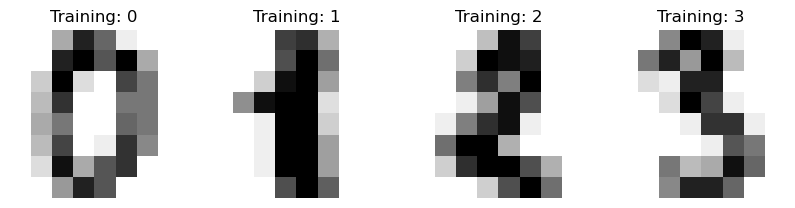

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a neural network
model = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', max_iter=3000)


# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3)

# Learn the digits on the train subset
model.fit(X_train,y_train.ravel())

# Predict the value of the digit on the test subset
predict_train = model.predict(X_train) #train the model with training data
predict_test = model.predict(X_test) #test the model on the testing data

model.score(X_train, y_train)

1.0

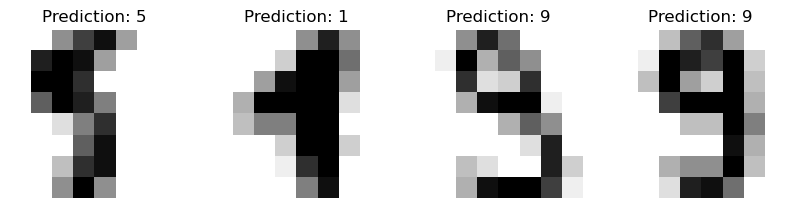

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predict_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [5]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predict_test)}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=3000):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.97      0.98      0.97        58
           2       0.96      1.00      0.98        55
           3       1.00      0.96      0.98        52
           4       1.00      1.00      1.00        55
           5       1.00      0.93      0.97        60
           6       1.00      0.96      0.98        56
           7       1.00      0.98      0.99        45
           8       0.94      0.94      0.94        50
           9       0.92      1.00      0.96        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540




Confusion matrix:
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 57  1  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  1  1]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  1  0  0 56  0  0  0  3]
 [ 1  0  0  0  0  0 54  0  1  0]
 [ 0  0  0  0  0  0  0 44  1  0]
 [ 0  2  0  0  0  0  0  0 47  1]
 [ 0  0  0  0  0  0  0  0  0 54]]


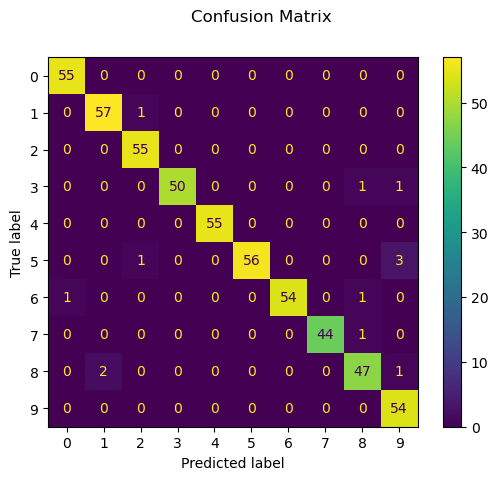

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Your turn
### Try changing the neural network parameters (number of hidden layers, number of neurons in each layer, activation functions) 